# Requirements

In [5]:
# Add as many imports as you need.
!pip install gdown==4.6.3

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the future **count of page loads**. To accomplish this use data from the past three days, which includes information such as the **count of page loads**, **count of unique visits**, **count of first time-visits**, and **count of returning visits**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future **count of page loads** based on the provided historical data.

## The Website Visitors Dataset

## Downloading the Website Visitors Dataset

In [6]:
!gdown 1h1P3NboXKbWNngqgCB1i4bHFRcv7uDJe

Downloading...
From: https://drive.google.com/uc?id=1h1P3NboXKbWNngqgCB1i4bHFRcv7uDJe
To: /content/website-visitors.csv
100% 92.8k/92.8k [00:00<00:00, 81.9MB/s]


## Exploring the Website Visitors Dataset
This datatset consists of daily counts of page loads, unique visitors, first-time visitors, and returning visitors for an academic teaching notes website. The dataset contains 2167 rows spanning from September 14, 2014, to August 19, 2020. A visit is defined as a series of hits on one or more pages by the same user on a given day, identified by IP address. Shared IP addresses are considered a single user. A visit is "unique" if a hit from the same IP address hasn't occurred within the last 6 hours. Returning visitors are identified by cookies, and the rest are classified as first-time visitors. The unique visitor count is the sum of returning and first-time visitors.

The dataset consists of the following columns:
- date - date in mm/dd/yyyy format,
- day_of_week - day of the week in text form (Monday, Tuesday, etc.),
- page_loads - daily number of pages loaded,
- unique_visits - daily number of visitors from IP addresses with no hits in over 6 hours,
- first_time_visits - number of unique visitors without a identifying cookie, and
- returning_visits - number of unique visitors minus first-time visitors.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [7]:
# Write your code here. Add as many boxes as you need.
import pandas as pd

df = pd.read_csv('/content/website-visitors.csv')
df

,date,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
0,9/14/2014,Sunday,2.146,1.582,1.430,152.0
1,9/15/2014,Monday,3.621,2.528,2.297,231.0
2,9/16/2014,Tuesday,3.698,2.630,2.352,278.0
3,9/17/2014,Wednesday,3.667,2.614,2.327,287.0
4,9/18/2014,Thursday,3.316,2.366,2.130,236.0
...,...,...,...,...,...,...
2162,8/15/2020,Saturday,2.221,1.696,1.373,323.0
2163,8/16/2020,Sunday,2.724,2.037,1.686,351.0
2164,8/17/2020,Monday,3.456,2.638,2.181,457.0
2165,8/18/2020,Tuesday,3.581,2.683,2.184,499.0


Explore the dataset using visualizations of your choice.

In [8]:
# Write your code here. Add as many boxes as you need.

Drop the column **day_of_week**, because we won't use it.

In [9]:
# Write your code here. Add as many boxes as you need.
df.drop('day_of_week', axis=1, inplace=True)
df

,date,page_loads,unique_visits,first_time_visits,returning_visits
0,9/14/2014,2.146,1.582,1.430,152.0
1,9/15/2014,3.621,2.528,2.297,231.0
2,9/16/2014,3.698,2.630,2.352,278.0
3,9/17/2014,3.667,2.614,2.327,287.0
4,9/18/2014,3.316,2.366,2.130,236.0
...,...,...,...,...,...
2162,8/15/2020,2.221,1.696,1.373,323.0
2163,8/16/2020,2.724,2.037,1.686,351.0
2164,8/17/2020,3.456,2.638,2.181,457.0
2165,8/18/2020,3.581,2.683,2.184,499.0


## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [10]:
# Write your code here. Add as many boxes as you need.
lag = 3

columns = df.iloc[:, 1:].columns
columns

Index(['page_loads', 'unique_visits', 'first_time_visits', 'returning_visits'], dtype='object')

In [11]:
for i in range(lag, 0, -1):
  for c in columns:
    df[f'{c}_prev_{i}'] = df[c].shift(i)

df

,date,page_loads,unique_visits,first_time_visits,returning_visits,page_loads_prev_3,unique_visits_prev_3,first_time_visits_prev_3,returning_visits_prev_3,page_loads_prev_2,unique_visits_prev_2,first_time_visits_prev_2,returning_visits_prev_2,page_loads_prev_1,unique_visits_prev_1,first_time_visits_prev_1,returning_visits_prev_1
0,9/14/2014,2.146,1.582,1.430,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/15/2014,3.621,2.528,2.297,231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.146,1.582,1.430,152.0
2,9/16/2014,3.698,2.630,2.352,278.0,NaN,NaN,NaN,NaN,2.146,1.582,1.430,152.0,3.621,2.528,2.297,231.0
3,9/17/2014,3.667,2.614,2.327,287.0,2.146,1.582,1.430,152.0,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0
4,9/18/2014,3.316,2.366,2.130,236.0,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0,3.667,2.614,2.327,287.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,8/15/2020,2.221,1.696,1.373,323.0,3.767,2.904,2.477,427.0,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0
2163,8/16/2020,2.724,2.037,1.686,351.0,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0
2164,8/17/2020,3.456,2.638,2.181,457.0,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0,2.724,2.037,1.686,351.0
2165,8/18/2020,3.581,2.683,2.184,499.0,2.221,1.696,1.373,323.0,2.724,2.037,1.686,351.0,3.456,2.638,2.181,457.0


In [12]:
for c in df.columns:
  if c != 'page_loads' and 'prev' not in c:
    df.drop(c, axis=1, inplace=True)

df

,page_loads,page_loads_prev_3,unique_visits_prev_3,first_time_visits_prev_3,returning_visits_prev_3,page_loads_prev_2,unique_visits_prev_2,first_time_visits_prev_2,returning_visits_prev_2,page_loads_prev_1,unique_visits_prev_1,first_time_visits_prev_1,returning_visits_prev_1
0,2.146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.146,1.582,1.430,152.0
2,3.698,NaN,NaN,NaN,NaN,2.146,1.582,1.430,152.0,3.621,2.528,2.297,231.0
3,3.667,2.146,1.582,1.430,152.0,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0
4,3.316,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0,3.667,2.614,2.327,287.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,2.221,3.767,2.904,2.477,427.0,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0
2163,2.724,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0
2164,3.456,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0,2.724,2.037,1.686,351.0
2165,3.581,2.221,1.696,1.373,323.0,2.724,2.037,1.686,351.0,3.456,2.638,2.181,457.0


In [13]:
df.dropna(axis=0, inplace=True)
df

,page_loads,page_loads_prev_3,unique_visits_prev_3,first_time_visits_prev_3,returning_visits_prev_3,page_loads_prev_2,unique_visits_prev_2,first_time_visits_prev_2,returning_visits_prev_2,page_loads_prev_1,unique_visits_prev_1,first_time_visits_prev_1,returning_visits_prev_1
3,3.667,2.146,1.582,1.430,152.0,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0
4,3.316,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0,3.667,2.614,2.327,287.0
5,2.815,3.698,2.630,2.352,278.0,3.667,2.614,2.327,287.0,3.316,2.366,2.130,236.0
6,1.658,3.667,2.614,2.327,287.0,3.316,2.366,2.130,236.0,2.815,1.863,1.622,241.0
7,2.288,3.316,2.366,2.130,236.0,2.815,1.863,1.622,241.0,1.658,1.118,985.000,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,2.221,3.767,2.904,2.477,427.0,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0
2163,2.724,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0
2164,3.456,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0,2.724,2.037,1.686,351.0
2165,3.581,2.221,1.696,1.373,323.0,2.724,2.037,1.686,351.0,3.456,2.638,2.181,457.0


In [14]:
df.isnull().sum()

page_loads                  0
page_loads_prev_3           0
unique_visits_prev_3        0
first_time_visits_prev_3    0
returning_visits_prev_3     0
page_loads_prev_2           0
unique_visits_prev_2        0
first_time_visits_prev_2    0
returning_visits_prev_2     0
page_loads_prev_1           0
unique_visits_prev_1        0
first_time_visits_prev_1    0
returning_visits_prev_1     0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [15]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split

features = []

for c in df.columns:
  if 'prev' in c:
    features.append(c)

features

['page_loads_prev_3',
 'unique_visits_prev_3',
 'first_time_visits_prev_3',
 'returning_visits_prev_3',
 'page_loads_prev_2',
 'unique_visits_prev_2',
 'first_time_visits_prev_2',
 'returning_visits_prev_2',
 'page_loads_prev_1',
 'unique_visits_prev_1',
 'first_time_visits_prev_1',
 'returning_visits_prev_1']

In [16]:
X, Y = df[features], df['page_loads']
X

,page_loads_prev_3,unique_visits_prev_3,first_time_visits_prev_3,returning_visits_prev_3,page_loads_prev_2,unique_visits_prev_2,first_time_visits_prev_2,returning_visits_prev_2,page_loads_prev_1,unique_visits_prev_1,first_time_visits_prev_1,returning_visits_prev_1
3,2.146,1.582,1.430,152.0,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0
4,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0,3.667,2.614,2.327,287.0
5,3.698,2.630,2.352,278.0,3.667,2.614,2.327,287.0,3.316,2.366,2.130,236.0
6,3.667,2.614,2.327,287.0,3.316,2.366,2.130,236.0,2.815,1.863,1.622,241.0
7,3.316,2.366,2.130,236.0,2.815,1.863,1.622,241.0,1.658,1.118,985.000,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2162,3.767,2.904,2.477,427.0,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0
2163,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0
2164,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0,2.724,2.037,1.686,351.0
2165,2.221,1.696,1.373,323.0,2.724,2.037,1.686,351.0,3.456,2.638,2.181,457.0


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [18]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [19]:
# Write your code here. Add as many boxes as you need.
X_train = X_train.reshape(X_train.shape[0], lag, X_train.shape[1] // lag)
X_test = X_test.reshape(X_test.shape[0], lag, X_test.shape[1] // lag)

In [20]:
X_train.shape, X_test.shape

((1731, 3, 4), (433, 3, 4))

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the future **count of page loads** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [21]:
# Write your code here. Add as many boxes as you need.
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(100,  activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.add(LSTM(50,  activation='relu', return_sequences=True))
model.add(LSTM(50,  activation='relu'))
model.add(Dense(1, activation='linear'))

Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [22]:
# Write your code here. Add as many boxes as you need.
import keras

model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [23]:
# Write your code here. Add as many boxes as you need.
history = model.fit(X_train, Y_train, batch_size=64, validation_split=0.2, epochs=50, shuffle=False)

Epoch 1/50
22/22 [==============================] - 4s 48ms/step - loss: 0.1575 - mean_squared_error: 0.1575 - mean_absolute_error: 0.3455 - val_loss: 0.1061 - val_mean_squared_error: 0.1061 - val_mean_absolute_error: 0.2736
Epoch 2/50
22/22 [==============================] - 1s 24ms/step - loss: 0.0470 - mean_squared_error: 0.0470 - mean_absolute_error: 0.1826 - val_loss: 0.0436 - val_mean_squared_error: 0.0436 - val_mean_absolute_error: 0.1718
Epoch 3/50
22/22 [==============================] - 0s 22ms/step - loss: 0.0363 - mean_squared_error: 0.0363 - mean_absolute_error: 0.1597 - val_loss: 0.0421 - val_mean_squared_error: 0.0421 - val_mean_absolute_error: 0.1694
Epoch 4/50
22/22 [==============================] - 0s 19ms/step - loss: 0.0347 - mean_squared_error: 0.0347 - mean_absolute_error: 0.1568 - val_loss: 0.0436 - val_mean_squared_error: 0.0436 - val_mean_absolute_error: 0.1721
Epoch 5/50
22/22 [==============================] - 0s 23ms/step - loss: 0.0341 - mean_squared_error

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

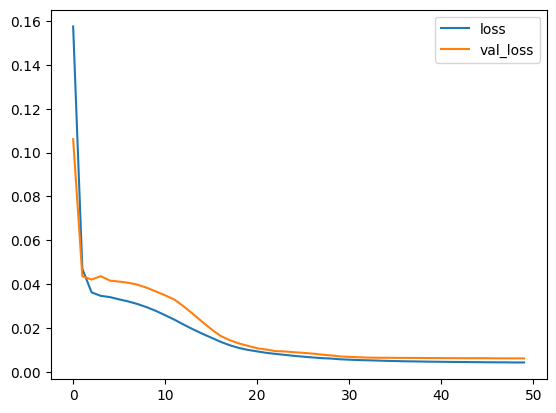

In [24]:
# Write your code here. Add as many boxes as you need.
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

Use the trained model to make predictions for the test set.

In [25]:
# Write your code here. Add as many boxes as you need.
preds = model.predict(X_test)
preds = scaler.inverse_transform(preds)

14/14 [==============================] - 0s 2ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [26]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

(0.25577641105001586, 0.3845563338964696, 0.7739707498484154)

Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

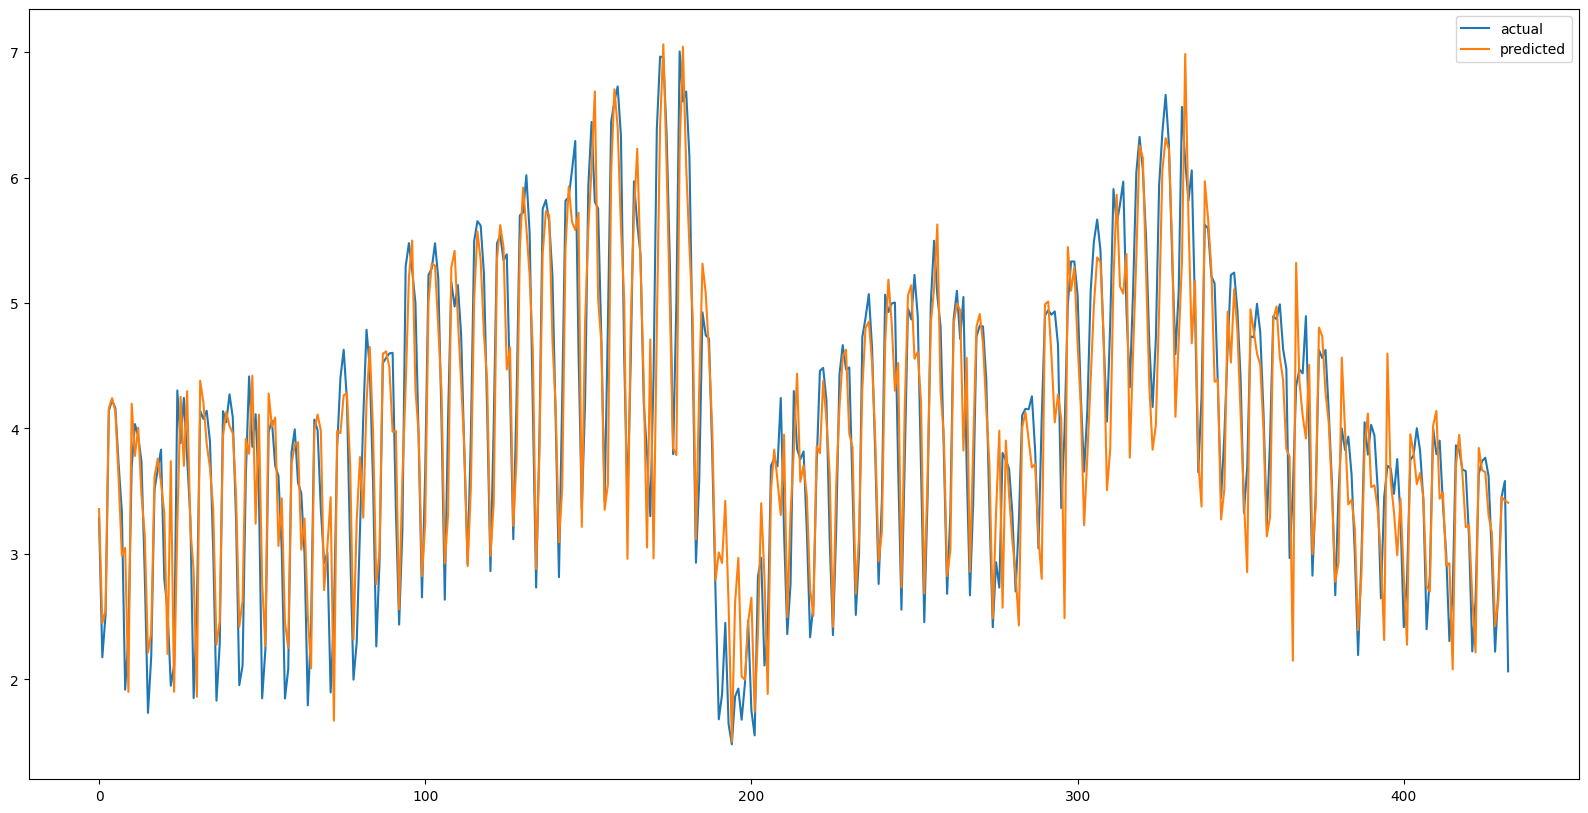

In [27]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to perform a sentiment analysis on a dataset consisting of wine reviews. The dataset contains two attributes: **description** and **points**. The description is a brief text describing the wine and the points which represents a quality metric ranging from 1 to 100. If some wine has at least 90 points it is considered **exceptional**. Your task involves predicting if some wine is exceptional based on its review.

The greater part of the code for the solution is already given. You need to define a tokenizer to tokenize the given texts and a deep neural network model that will be used for the classification task at hand. Fill in only the missing code blocks.

## Requirements

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Downloading the Wine Reviews Dataset

In [29]:
!gdown 1fz9449M9Owofy6CYrKzkGwXKesI32B8u

Downloading...
From: https://drive.google.com/uc?id=1fz9449M9Owofy6CYrKzkGwXKesI32B8u
To: /content/wine-reviews.csv
100% 32.5M/32.5M [00:00<00:00, 153MB/s]


## Exploring the Wine Reviews Dataset

Load the dataset into a `pandas` data frame.

In [30]:
df = pd.read_csv('wine-reviews.csv')

In [31]:
df.head()

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


## Feature Extraction

Extract the feature `exceptional` for each wine review.

In [32]:
df['exceptional'] = df['points'].apply(lambda elem: 1 if elem >= 90 else 0)

In [41]:
df

,description,points,exceptional
0,"Aromas include tropical fruit, broom, brimston...",87,0
1,"This is ripe and fruity, a wine that is smooth...",87,0
2,"Tart and snappy, the flavors of lime flesh and...",87,0
3,"Pineapple rind, lemon pith and orange blossom ...",87,0
4,"Much like the regular bottling from 2012, this...",87,0
...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,90,1
129967,Citation is given as much as a decade of bottl...,90,1
129968,Well-drained gravel soil gives this wine its c...,90,1
129969,"A dry style of Pinot Gris, this is crisp with ...",90,1


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [33]:
X, y = df['description'], df['exceptional']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Text Tokenization

Use tokenizer to convert raw text into a sequence of tokens.

In [36]:
# Write your code here. Add as many boxes as you need.
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

max_tokens = 64

tokenizer = Tokenizer(num_words=max_tokens)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

## Padding
Pad each sequence to maximum length of 16.

In [37]:
# Write your code here. Add as many boxes as you need.
maxlen = 16

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [42]:
y.value_counts()

0    80926
1    49045
Name: exceptional, dtype: int64

## Deep Neural Network

Define Deep Neural Network model to predict if a specific wine is exceptional or not based on the tokenized and padded wine reviews.

In [54]:
# Write your code here. Add as many boxes as you need.
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report

model = Sequential()
model.add(Embedding(max_tokens, 32, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Compile the previously defined model specifying loss function, optimizer and evaluation metrics.

In [55]:
# Write your code here. Add as many boxes as you need.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Fit the compiled model on the train set specifying the percent for validation, batch_size, and number of epochs.

In [56]:
# Write your code here. Add as many boxes as you need.
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=5)

Epoch 1/5
1300/1300 [==============================] - 28s 18ms/step - loss: 0.5949 - accuracy: 0.6740 - val_loss: 0.5765 - val_accuracy: 0.6938
Epoch 2/5
1300/1300 [==============================] - 23s 18ms/step - loss: 0.5733 - accuracy: 0.6959 - val_loss: 0.5708 - val_accuracy: 0.6978
Epoch 3/5
1300/1300 [==============================] - 23s 18ms/step - loss: 0.5651 - accuracy: 0.7025 - val_loss: 0.5658 - val_accuracy: 0.7017
Epoch 4/5
1300/1300 [==============================] - 22s 17ms/step - loss: 0.5577 - accuracy: 0.7091 - val_loss: 0.5634 - val_accuracy: 0.7029
Epoch 5/5
1300/1300 [==============================] - 25s 19ms/step - loss: 0.5530 - accuracy: 0.7117 - val_loss: 0.5600 - val_accuracy: 0.7050


Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

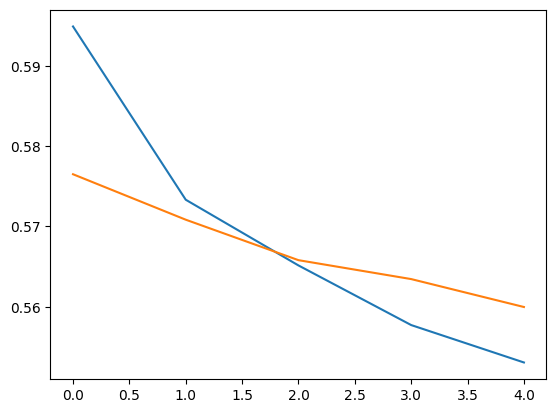

In [57]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

Use the trained model to make predictions for the test set.

In [58]:
y_pred = model.predict(X_test)

813/813 [==============================] - 3s 3ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [59]:
print(classification_report(y_test, np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79     16264
           1       0.66      0.46      0.54      9731

    accuracy                           0.71     25995
   macro avg       0.69      0.66      0.67     25995
weighted avg       0.70      0.71      0.70     25995

